# Exercise 3: MAP Classifier

In this assignment you will implement a few of the MAP classifiers learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this part of the exercise.
2. Write vectorized code whenever possible.
3. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
4. Write your functions in the provided `hw3.py` python module only. All the logic you write is imported and used in this jupyter notebook.
5. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports detected in `hw3.py` will earn you the grade of 0, even if you only used them for testing.
6. Your code must run without errors. During the environment setup, you were given a specific version of `numpy` to install. Changes of the configuration we provided are at your own risk. Code that cannot run will also earn you the grade of 0.
7. Write your own code. Cheating will not be tolerated. 
8. Submission includes the `hw3.py` file and this notebook. Answers to qualitative questions should be written in markdown cells (with $\LaTeX$ support).
9. You are allowed to include additional functions.
10. Submission: zip only the completed jupyter notebook and the python file `hw3.py`. Do not include the data or any directories. Name the file `ID1_ID2.zip` and submit only one copy of the assignment.

## In this exercise you will perform the following:
1. Implement a Naive Bayeas Classifier based on Multi Normal distribution
1. Implement a Full Bayes Classifier based on Multi-Normal distribution
1. Implement a Distcrete Naive Bayes Classifier.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hw3 import *

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2


# Normal Naive Bayes Classifier Vs Normal Full Bayes Classifier
In the following section we are going to compare 2 models on a given dataset. <br>
The 2 classifiers we are going to test are:
1. Naive Bayes classifer.<br>
1. Full Bayes classifier.<br>
Recall that a Naive Bayes classifier makes the following assumption :<br> 
## $$ p(x_1, x_2, ..., x_n|A_j) = \Pi p(x_i | A_j) $$
But the full Bayes classifier will not make this assumption.<br>

### The Data Story

In a farway land called **Randomistan** there is a rare animal called the **Randomammal**.<br> 
We have gathered data about this unique animal to help the **randomian** researchers in observing this beast. <br>
For a 1000 days straight we have measured the temparture and the humidty in Randomistan and wether the Randomammal was spotted or not. <br>
The well known randomian **Bob** is a bit of a lazy researcher so he likes to keep things simple, and so he assumes that the temperature and the humidity are independent given the class. <br>
**Alice** on the other hand is a hard working researcher and does not make any assumptions, she's young and is trying to gain some fame in the randomian community.

The dataset contains 2 features(**Temperature**, **Humidty**) along side a binary label (**Spotted**) for each instance.<br>

We are going to test 2 different classifiers :
* Naive Bayes Classifier (Bob)
* Full Bayes Classifier. (Alice)

Both of our researchers asumme that our features are norammly distributed. But while Bob with his Naive classifier will assume that the features are independet, Alice and her Full Bayes classifier will not make this assumption.<br><br>
Let's start off by loading the data (train, test) into a pandas dataframe and then converting them
into numpy arrays.<br>
The datafiles located in the data folder are :
- randomammal_train.csv
- randomammal_test.csv

In [8]:
# Load the train and test set into a pandas dataframe and convert them into a numpy array.
train = np.array(pd.read_csv('data/randomammal_train.csv'))
test = np.array(pd.read_csv('data/randomammal_test.csv'))

array([47.98973623, 50.1022401 , 48.40414682, ..., 52.60810327,
       48.58095862, 47.4947022 ])

# Data Visualization
Draw a scatter plot of the training data where __x__=Temerature and **y**=Humidity. <br>
Use color to distinguish points from different classes.<br>
Stop for a minute to think about Alice and Bob's approaches and which one you expect to work better.

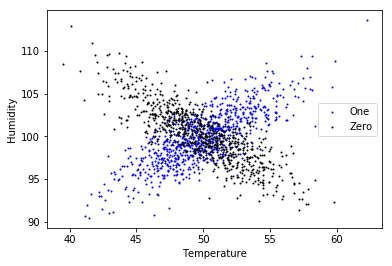

In [131]:
# Your code goes here.
one = train[train[:,-1]==1]
zero = train[train[:,-1]==0]
plt.scatter(one[:,0], one[:,1], c='blue', s=1)
plt.scatter(zero[:,0], zero[:,1], color='black', s=1)
plt.ylabel('Humidity')
plt.xlabel('Temperature')
plt.legend(['One', 'Zero'])
plt.show()

## Bob's Naive Model

Start with implementing the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) probability density function in your hw3.py: 
$$ \frac{1}{\sqrt{2\pi \sigma^2}} \cdot e ^{-\frac{(x - \mu)^2}{2\sigma^2}} $$
Where :
* $\mu$ is the distribution mean.
* $\sigma$ is the distribution standard deviation.

Recall that when using the naive assumption, we assume our features are indepenent given the class. Meaning:
$$ P(x_1, x_2 | Y) = p(x_1 | Y) \cdot p(x_2 | Y)$$
Since we assume our features are normally distributed we need to find the mean and std for each feature in order for us to compute those probabilites.<br>
Implement the **NaiveNormalClassDistribution** in hw3.py and build a distribution object for each class.

In [86]:
# Build the a NaiveNormalClassDistribution for each class.
naive_normal_CD_0 = NaiveNormalClassDistribution(train, 0)
naive_normal_CD_1 = NaiveNormalClassDistribution(train, 1)

0.006408682623537525

Implement the **MAPClassifier** class in hw3.py and build a MAPClassifier object contating the 2 distribution objects you just made above.

In [88]:
naive_normal_classifier = MAPClassifier(naive_normal_CD_0, naive_normal_CD_1)

### Evaluate model
Implement the **compute_accuracy** function in your hw3.py file.<br>
Use that function and the 2 distribution objects you created to compute the accuracy on the test set.

In [136]:
# Compute the naive model accuracy and store it in the naive accuracy variable.
naive_accuracy = compute_accuracy(test, naive_normal_classifier)
naive_accuracy

49.5

## Alice's Full Model

Start with Implementing the [multivariate normal](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) distribution probability density function in your hw3.py file.

## $$ (2\pi)^{-\frac{d}{2}} det(\Sigma )^{-\frac{1}{2}} \cdot e ^{-\frac{1}{2}(x-\mu)^T \Sigma ^ {-1} (x - \mu) }$$

Where : 
* $\mu$ is the distribution mean vector. (length 2 in our case)
* $\Sigma$ Is the distribution covarince matrix. (size 2x2 in our case)

In the full bayes model we will not make any simplyfing assumptions, meaning, we will use a multivariate normal distribution. <br>
And so, we'll need to compute the mean of each feature and to compute the covariance between the features to build the covariance matrix.
Implement the **MultiNormalClassDistribution** in hw3.py and build a distribution object for each class.

In [137]:
# Build the a MultiNormalClassDistribution for each class.
multi_normal_CD_0 = MultiNormalClassDistribution(train, 0)
multi_normal_CD_1 = MultiNormalClassDistribution(train, 1)

build a MAPClassifier object contating the 2 distribution objects you just made above.

In [138]:
multi_normal_classifier = MAPClassifier(multi_normal_CD_0, multi_normal_CD_1)

### Evaluate model
Use the **compute_accuracy** function and the 2 distribution objects you created to compute the accuracy on the test set.

In [139]:
# Compute the naive model accuracy and store it in the naive accuracy variable.
full_accuracy = compute_accuracy(test, multi_normal_classifier)

## Results

Use a plot bar to showcase the models accuracy. 1 bar for each model

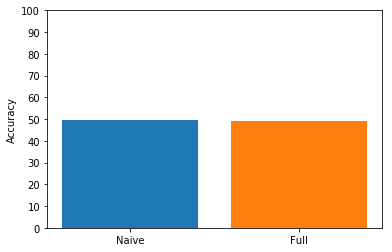

In [152]:
# Bar plot of accuracy of each model side by side.
p1 = plt.bar(1, naive_accuracy)
p2 = plt.bar(2, full_accuracy)

plt.ylabel('Accuracy')
plt.xticks([1, 2], ('Naive', 'Full'))
plt.yticks(np.arange(0, 110, 10))

plt.show()

# Discrete Naive Bayes Classifier 

We will now build a discrete naive Bayes based classifier using **Laplace** smoothing.
In the recitation, we saw how to compute the probability for each attribute value under each class:

$$ P(x_j | A_i) = \frac{n_{ij} + 1}{n_i + |V_j|} $$
Where:
* $n_{ij}$ The number of training instances with the class $A_i$ and the value $x_j$ in the relevant attribute.
* $n_i$ The number of training instances with the class $A_i$
* $|V_j|$ The number of possible values of the relevant attribute.

In order to compute the likelihood we assume:
$$ P(x| A_i) = \prod\limits_{j=1}^{n}P(x_j|A_i) $$

And to classify an instance we will choose : 
$$\arg\!\max\limits_{i} P(A_i) \cdot P(x | A_i)$$


## Data
We will try to predict breast cancer again only this time from a different dataset, 
<br> you can read about the dataset here : [Breast Cancer Dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer)<br>
Load the training set and test set provided for you in the data folder.
 - breast_trainset.csv
 - breast_testset.csv
 

In [166]:
# Load the train and test set into a pandas dataframe and convert them into a numpy array.
b_train = np.array(pd.read_csv('data/breast_trainset.csv'))
b_test = np.array(pd.read_csv('data/breast_testset.csv'))

(array([ 0,  1,  2,  3,  4,  5,  6,  7, 10], dtype=int64),
 array([204, 144, 107,  45,  29,  26,   5,   8,   2], dtype=int64))

## Build A Discrete Naive Bayes Distribution for each class
Implement the **DiscreteNBClassDistribution** in hw3.py and build a distribution object for each class.

In [178]:
discrete_naive_CD_0 = DiscreteNBClassDistribution(b_train, 0)
discrete_naive_CD_1 = DiscreteNBClassDistribution(b_train, 1)

build a MAPClassifier object contating the 2 distribution objects you just made above.

In [179]:
discrete_naive_classifier = MAPClassifier(discrete_naive_CD_0, discrete_naive_CD_1)

Use the **compute_accuracy** function and the 2 distribution objects you created to compute the accuracy on the test set.

In [180]:
# Your code here
compute_accuracy(b_test, discrete_naive_classifier)

64.91228070175438